## coco dataset

https://cocodataset.org/#download

### coco api

https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

### 1. instances_val2017

+ instance segmentaion

+ bounding box 

In [8]:
import wget, os

In [172]:
# download val image and annotations
DataDir = 'H:\\Dataset\\COCO\\val2017'
if not os.path.exists(DataDir):
    wget.download('http://images.cocodataset.org/zips/val2017.zip', DataDir + '.zip')

annFile = 'H:\\Dataset\\COCO\\annotations\\annotations_trainval2017\\annotations\\instances_val2017.json'
if not os.path.exists(annFile):
    wget.download('http://images.cocodataset.org/annotations/annotations_trainval2017.zip', 'H:\\Dataset\\COCO\\annotations\\annotations_trainval2017.zip')

In [156]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
# import pylab

In [173]:
# initialize COCO api for instance annotations
assert os.path.exists(annFile)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [174]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor electronic furniture indoor appliance person kitchen animal vehicle sports food accessory


In [163]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
imgIds = coco.getImgIds(catIds=catIds )
# imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img['id'])

279278


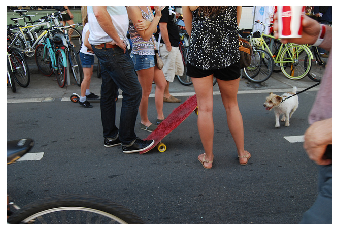

In [164]:
# load and display image
I = io.imread(os.path.join(DataDir, img['file_name']))

# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

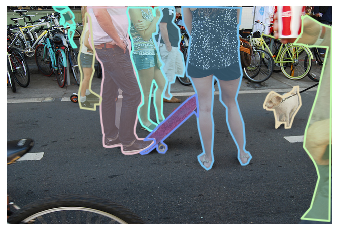

In [167]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=False)

### 2. stuff_val2017

In [237]:
# download val image and annotations
DataDir = 'H:\\Dataset\\COCO\\val2017'
if not os.path.exists(DataDir):
    wget.download('http://images.cocodataset.org/zips/val2017.zip', DataDir + '.zip')

annFile = 'H:\\Dataset\\COCO\\annotations\\stuff_annotations_trainval2017\\annotations\\stuff_val2017.json'
if not os.path.exists(annFile):
    wget.download('http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip', 'H:\\Dataset\\COCO\\annotations\\stuff_annotations_trainval2017.zip')

In [238]:
# initialize COCO api for instance annotations
assert os.path.exists(annFile)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [239]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
banner blanket branch bridge building-other bush cabinet cage cardboard carpet ceiling-other ceiling-tile cloth clothes clouds counter cupboard curtain desk-stuff dirt door-stuff fence floor-marble floor-other floor-stone floor-tile floor-wood flower fog food-other fruit furniture-other grass gravel ground-other hill house leaves light mat metal mirror-stuff moss mountain mud napkin net paper pavement pillow plant-other plastic platform playingfield railing railroad river road rock roof rug salad sand sea shelf sky-other skyscraper snow solid-other stairs stone straw structural-other table tent textile-other towel tree vegetable wall-brick wall-concrete wall-other wall-panel wall-stone wall-tile wall-wood water-other waterdrops window-blind window-other wood other

COCO supercategories: 
other structural sky raw-material window building ground textile solid wall plant ceiling furniture-stuff food-stuff floor water


In [212]:
cats

[{'supercategory': 'textile', 'id': 92, 'name': 'banner'},
 {'supercategory': 'textile', 'id': 93, 'name': 'blanket'},
 {'supercategory': 'plant', 'id': 94, 'name': 'branch'},
 {'supercategory': 'building', 'id': 95, 'name': 'bridge'},
 {'supercategory': 'building', 'id': 96, 'name': 'building-other'},
 {'supercategory': 'plant', 'id': 97, 'name': 'bush'},
 {'supercategory': 'furniture-stuff', 'id': 98, 'name': 'cabinet'},
 {'supercategory': 'structural', 'id': 99, 'name': 'cage'},
 {'supercategory': 'raw-material', 'id': 100, 'name': 'cardboard'},
 {'supercategory': 'floor', 'id': 101, 'name': 'carpet'},
 {'supercategory': 'ceiling', 'id': 102, 'name': 'ceiling-other'},
 {'supercategory': 'ceiling', 'id': 103, 'name': 'ceiling-tile'},
 {'supercategory': 'textile', 'id': 104, 'name': 'cloth'},
 {'supercategory': 'textile', 'id': 105, 'name': 'clothes'},
 {'supercategory': 'sky', 'id': 106, 'name': 'clouds'},
 {'supercategory': 'furniture-stuff', 'id': 107, 'name': 'counter'},
 {'superc

In [273]:
img = coco.loadImgs(coco.getImgIds())[1]

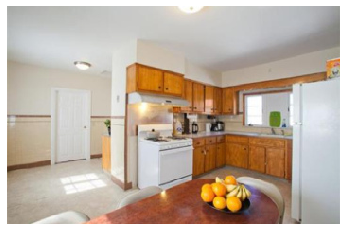

In [274]:
# load and display image
I = io.imread(os.path.join(DataDir, img['file_name']))

# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

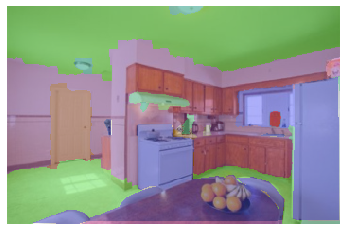

In [276]:
# load and display instance annotations

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=False)

102


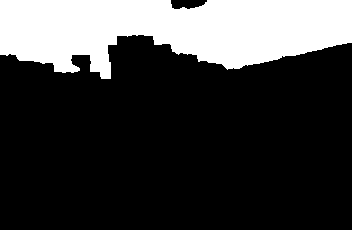

In [285]:
print(anns[2]['category_id'])
Image.fromarray(coco.annToMask(anns[2])*255)

### 3. panoptic_val2017

In [286]:
# download val image and annotations
DataDir = 'H:\\Dataset\\COCO\\val2017'
if not os.path.exists(DataDir):
    wget.download('http://images.cocodataset.org/zips/val2017.zip', DataDir + '.zip')

annFile = 'H:\\Dataset\\COCO\\annotations\\panoptic_annotations_trainval2017\\annotations\\panoptic_val2017.json'
if not os.path.exists(annFile):
    wget.download('http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip', 'H:\\Dataset\\COCO\\annotations\\panoptic_annotations_trainval2017.zip')

In [287]:
# initialize COCO api for instance annotations
assert os.path.exists(annFile)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.14s)
creating index...


KeyError: 'id'